# Trabajo Práctico Interpolación de Imágenes
### Integrantes: Berretta Tomás, Bruno Tomás, Ferrari Ignacio, Kinderknetch Mauro

## Introducción: 
En este trabajo vamos a implementar tres variantes diferentes de escalado de
imágenes utilizando las siguientes funciones de interpolación:
Vecino más cercano: solo tiene en cuenta un píxel: el más cercano al punto interpolado.
Bilineal: tiene en cuenta los valores en los píxeles conocidos que rodean a uno dado en
una vecindad de los 2x2 píxeles más cercanos. Se toma el promedio ponderado de estos 4
píxeles y se calcula el valor interpolado.
Bicúbica: Un paso más allá del caso bilineal es considerar la vecindad de los 4x4 píxeles
conocidos más cercanos, es decir, un total de 16 píxeles. Cómo están situados a distancias
distintas del píxel de valor desconocido, se da mayor peso en el cálculo a los más cercanos.

## Código
### Vecino Más Cercano:

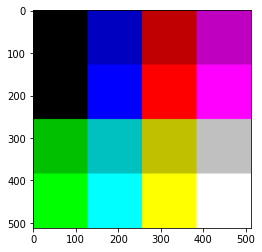

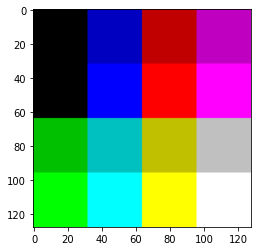

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Leer una imagen
img = plt.imread("test_1.jpg")

# Interpolar valores desconocidos
def zoom_in_closest(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Tamaño nuevo
    new_width = width * 2
    new_height = height * 2
    
    #Creamos una imagen negra del doble de tamaño
    resized_image = np.zeros((new_height, new_width, t))
    
    #Interpola la imagen con los mas cercanos
    for i in range(new_width):
        for j in range(new_height):
            resized_image[i,j] = img[i//2, j//2]
            for k in range(3):
                if(resized_image[i,j][k] >= 1): resized_image[i,j][k] = 1
                if(resized_image[i,j][k] <= 0): resized_image[i,j][k] = 0
            
    # Guardamos la imagen en disco
    plt.imsave('test_bigger_closest.png', resized_image)

    #Mostramos la imagen en pantalla
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()
    return resized_image
            
zoom_in_closest(img)

def zoom_out_closest(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Tamaño nuevo
    new_width = width // 2
    new_height = height // 2
    
    #Creamos una imagen negra de la mitad de tamaño
    resized_image = np.zeros((new_height, new_width, t))
    
    #Interpola la imagen con los mas cercanos
    for i in range(new_width):
        for j in range(new_height):
            resized_image[i,j] = img[i*2, j*2]
            for k in range(3):
                if(resized_image[i,j][k] >= 1): resized_image[i,j][k] = 1
                if(resized_image[i,j][k] <= 0): resized_image[i,j][k] = 0
            
    # Guardamos la imagen en disco
    plt.imsave('test_bigger_closest.png', resized_image)

    #Mostramos la imagen en pantalla
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()
    return resized_image

img = zoom_out_closest(img)

### Bilineal

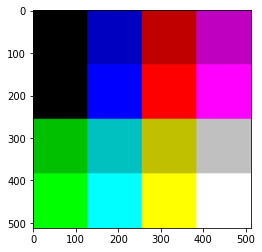

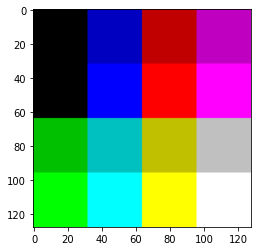

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Leer una imagen
img = plt.imread("test_1.jpg")


def zoom_in_bilineal(array_in):
    # Obtener la dimensión de la imagen
    height_in, width_in, t = img.shape
    t = 3

    # Tamaño nuevo
    width_out = width_in * 2
    height_out = height_in * 2

    # Creamos una imagen negra del doble de tamaño
    array_out = np.zeros((height_out, width_out, t))

    # Interpolar valores desconocidos
    for i in range(height_out):
        for j in range(width_out):
            # Relative coordinates of the pixel in output space
            x_out = j / width_out
            y_out = i / height_out

            # Corresponding absolute coordinates of the pixel in input space
            x_in = (x_out * width_in)
            y_in = (y_out * height_in)

            # Nearest neighbours coordinates in input space
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # Sanitize bounds - no need to check for < 0
            x_prev = min(x_prev, width_in - 1)
            x_next = min(x_next, width_in - 1)
            y_prev = min(y_prev, height_in - 1)
            y_next = min(y_next, height_in - 1)

            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in
            Dy_prev = 1. - Dy_next  # because next - prev = 1
            Dx_next = x_next - x_in
            Dx_prev = 1. - Dx_next  # because next - prev = 1

            # Interpolate over 3 RGB layers
            for c in range(3):
                array_out[i][j][c] = Dy_prev * (
                        array_in[y_next][x_prev][c] * Dx_next + array_in[y_next][x_next][c] * Dx_prev) \
                                     + Dy_next * (array_in[y_prev][x_prev][c] * Dx_next + array_in[y_prev][x_next][c]
                                                  * Dx_prev)

    # Guardamos la imagen en disco
    plt.imsave('test_bigger_bilineal.png', array_out)

    # Mostramos la imagen en pantalla
    plt.imshow(array_out, vmin=0, vmax=1)
    plt.show()


zoom_in_bilineal(img)


def zoom_out_bilineal(array_in):
    # Obtener la dimensión de la imagen
    height_in, width_in, t = img.shape
    t = 3

    # Tamaño nuevo
    width_out = width_in // 2
    height_out = height_in // 2

    # Creamos una imagen negra de la mitad de tamaño
    array_out = np.zeros((height_out, width_out, t))

    for i in range(height_out):
        for j in range(width_out):
            # Relative coordinates of the pixel in output space
            x_out = j / width_out
            y_out = i / height_out

            # Corresponding absolute coordinates of the pixel in input space
            x_in = (x_out * width_in)
            y_in = (y_out * height_in)

            # Nearest neighbours coordinates in input space
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # Sanitize bounds - no need to check for < 0
            x_prev = min(x_prev, width_in - 1)
            x_next = min(x_next, width_in - 1)
            y_prev = min(y_prev, height_in - 1)
            y_next = min(y_next, height_in - 1)

            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in
            Dy_prev = 1. - Dy_next  # because next - prev = 1
            Dx_next = x_next - x_in
            Dx_prev = 1. - Dx_next  # because next - prev = 1

            # Interpolate over 3 RGB layers
            for c in range(3):
                array_out[i][j][c] = Dy_prev * (
                        array_in[y_next][x_prev][c] * Dx_next + array_in[y_next][x_next][c] * Dx_prev) \
                                     + Dy_next * (array_in[y_prev][x_prev][c] * Dx_next + array_in[y_prev][x_next][c]
                                                  * Dx_prev)

    # Guardamos la imagen en disco
    plt.imsave('test_smaller_bilineal.png', array_out)

    # Mostramos la imagen en pantalla
    plt.imshow(array_out, vmin=0, vmax=1)
    plt.show()


zoom_out_bilineal(img)


### Bicubica

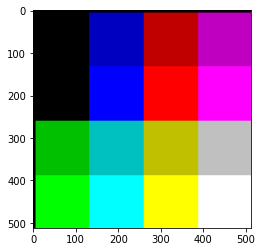

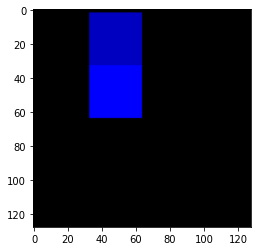

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Leer una imagen
img = plt.imread("test_1.jpg")


def S(x):
    x = np.abs(x)
    if 0 <= x < 1:
        return 1 - 2 * x * x + x * x * x
    if 1 <= x < 2:
        return 4 - 8 * x + 5 * x * x - x * x * x
    else:
        return 0


def zoom_in_bicubic(img):
    height, width, channels = img.shape
    m = height * 2
    n = width * 2
    array_out = np.zeros((m, n, 3))
    sh = m / height
    sw = n / width
    for i in range(m):
        for j in range(n):
            x = i / sh
            y = j / sw
            p = (i + 0.0) / sh - x
            q = (j + 0.0) / sw - y
            x = int(x) - 2
            y = int(y) - 2
            A = np.array([
                [S(1 + p), S(p), S(1 - p), S(2 - p)]
            ])
            if x >= m - 3:
                m - 1
            if y >= n - 3:
                n - 1
            if 1 <= x <= (m - 3) and 1 <= y <= (n - 3):
                B = np.array([
                    [img[x - 1, y - 1], img[x - 1, y],
                     img[x - 1, y + 1],
                     img[x - 1, y + 1]],
                    [img[x, y - 1], img[x, y],
                     img[x, y + 1], img[x, y + 2]],
                    [img[x + 1, y - 1], img[x + 1, y],
                     img[x + 1, y + 1], img[x + 1, y + 2]],
                    [img[x + 2, y - 1], img[x + 2, y],
                     img[x + 2, y + 1], img[x + 2, y + 1]],

                ])
                C = np.array([
                    [S(1 + q)],
                    [S(q)],
                    [S(1 - q)],
                    [S(2 - q)]
                ])
                blue = np.dot(np.dot(A, B[:, :, 0]), C)[0, 0]
                green = np.dot(np.dot(A, B[:, :, 1]), C)[0, 0]
                red = np.dot(np.dot(A, B[:, :, 2]), C)[0, 0]

                array_out[i, j] = [blue, green, red]
    # Guardamos la imagen en disco
    plt.imsave('test_bigger_bicubic.png', array_out)

    # Mostramos la imagen en pantalla
    plt.imshow(array_out, vmin=0, vmax=1)
    plt.show()


zoom_in_bicubic(img)


def zoom_out_bicubic(img):
    height, width, channels = img.shape
    m = height // 2
    n = width // 2
    array_out = np.zeros((m, n, 3))
    sh = m / height
    sw = n / width
    for i in range(m):
        for j in range(n):
            x = i / sh
            y = j / sw
            p = (i + 0.0) / sh - x
            q = (j + 0.0) / sw - y
            x = int(x) - 2
            y = int(y) - 2
            A = np.array([
                [S(1 + p), S(p), S(1 - p), S(2 - p)]
            ])
            if x >= m - 3:
                m - 1
            if y >= n - 3:
                n - 1
            if 1 <= x <= (m - 3) and 1 <= y <= (n - 3):
                B = np.array([
                    [img[x - 1, y - 1], img[x - 1, y],
                     img[x - 1, y + 1],
                     img[x - 1, y + 1]],
                    [img[x, y - 1], img[x, y],
                     img[x, y + 1], img[x, y + 2]],
                    [img[x + 1, y - 1], img[x + 1, y],
                     img[x + 1, y + 1], img[x + 1, y + 2]],
                    [img[x + 2, y - 1], img[x + 2, y],
                     img[x + 2, y + 1], img[x + 2, y + 1]],

                ])
                C = np.array([
                    [S(1 + q)],
                    [S(q)],
                    [S(1 - q)],
                    [S(2 - q)]
                ])
                blue = np.dot(np.dot(A, B[:, :, 0]), C)
                green = np.dot(np.dot(A, B[:, :, 1]), C)
                red = np.dot(np.dot(A, B[:, :, 2]), C)

                array_out[i, j] = [blue, green, red]
    # Guardamos la imagen en disco
    plt.imsave('test_smaller_bicubic.png', array_out)

    # Mostramos la imagen en pantalla
    plt.imshow(array_out, vmin=0, vmax=1)
    plt.show()


zoom_out_bicubic(img)


## Conclusiones
Después de realizar las interpolaciones con los distintos métodos llegamos a las siguientes conclusiones:
La interpolación por vecino más cercano es la más rapida